# VISUALISING LINEAR RELATIONSHIPS ACROSS DATASETS

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [20]:
wine_data = pd.read_csv('datasets/winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')


Sometimes, when working with bivariate plots, it is not clear as to how exactly one variable varies with respect to another. Thus, it becomes easier to study the variation in one variable with respect to another independent variable. In statistics, this is called the regression plot.

Let us first look at the lmplot() function, a function in seaborn used to visualize a linear relationship as determined through regression. Maybe this will give us more clarity about our wine samples.

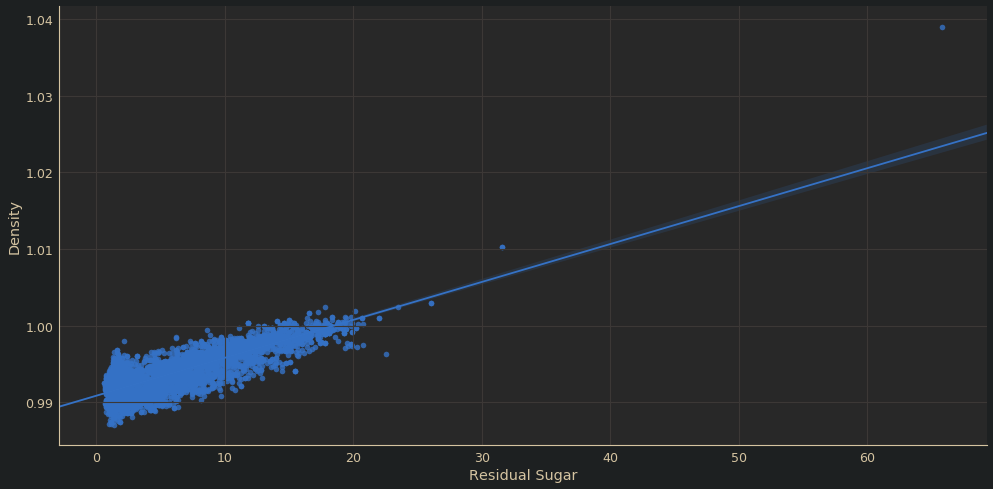

In [21]:
sns.lmplot(x='Residual Sugar', y='Density', data=wine_data, size=7, aspect=2)

From the regression plot, the residual sugar content seems to have a somewhat direct relationship with the density of the wine sample.

From the plot, we observe that:
* The lmplot draws a scatter plot of the input variables
* The functions fit the regression model y~x
* The regression line is plotted
* There is 95% confidence interval for the regression that can be observed as a shaded region around the regression line

*A confidence interval gives an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data. (Definition taken from Valerie J. Easton and John H. McColl's Statistics Glossary v1.1)*
https://www.investopedia.com/terms/c/confidenceinterval.asp

Let us try to understand the relationship between the alcohol content and the quality of the wine.

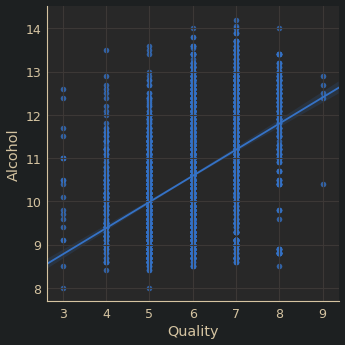

In [22]:
sns.lmplot(x='Quality', y='Alcohol', data=wine_data)

As Quality takes only certain fixed values, we see that the scatter plot is more like a set of lines rather than a set of points that guides the regression line.

#### For a better estimate, we could do one of the below
* add some jitter to the points (the regression line fit is not affected by this) 
* Consider a statistical analysis of the points, and replace the plot by its central tendency, along with permissible margins

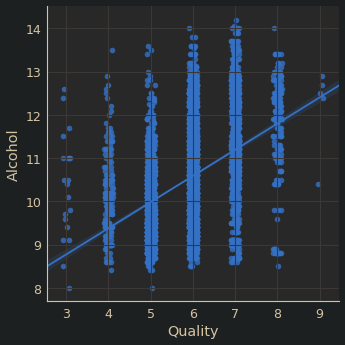

In [23]:
#Adding jitter to the scatter plots
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_jitter=.1)

You can see that the added jitter has taken effect in the form of shifting the points a little along the x-axis.

For the central tendency approach, we need a statistical function that can estimate the mean value of the given set of values. This can be obtained from Numpy library, which is a Python scientific computing package that adds support for large multi dimensional arrays and matrices.


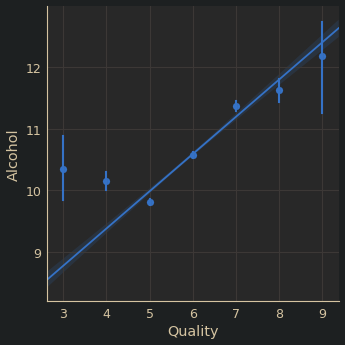

In [24]:
#importing numpy
import numpy as np

#Collapsing the data points in each bin and plotting the central tendency
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_estimator=np.mean)

From the above graph, we know that there is a good balance of wine samples across various alcohol levels, with a quality of 6. 

## Fitting Different kinds of models
**The data we have dealt with so far follows linear relationships with respect to the regression line. 
What if the plots follows different order relationships? Can we still use the same method to obtain regression plots?**

lmplot has parameters that can be set to study such distributions. The regression line is then plotted based on the way the distribution is handled, and the curve is a better fit to the distribution.
A few examples of such distributions are parabolic distributions, binary data representations etc.

In such cases, a function called residplot can be used to get a rough sketch to see if the linear regression is appropriate for the distribution. If there are structures in the resulting graph, rather than points spread around the regression line, we need to consider applying an alternative regression method.

### What if we want to compare and contrast more than just two parameters?

lmplot combines regplot() and Facetgrid(), an object that links Pandas DataFrame to a matplotlib figure, which makes it possible to visualise interactions with upto 3 additional categories. The plots can be differentiated by colour/markers, additional rows and columns.<br>
*Lets use this to try and find the effect every component has on the pH level of the wine sample*

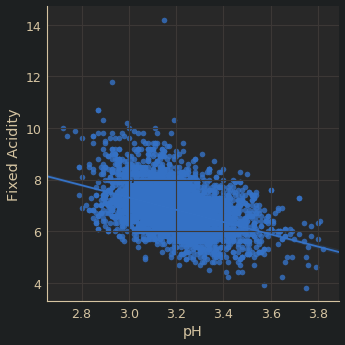

In [25]:
# We plot the relationship between Fixed Acidity content in the wine sample to its pH value
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data)

Let us create a column of graphs which varies by the quality of the wine sample. 

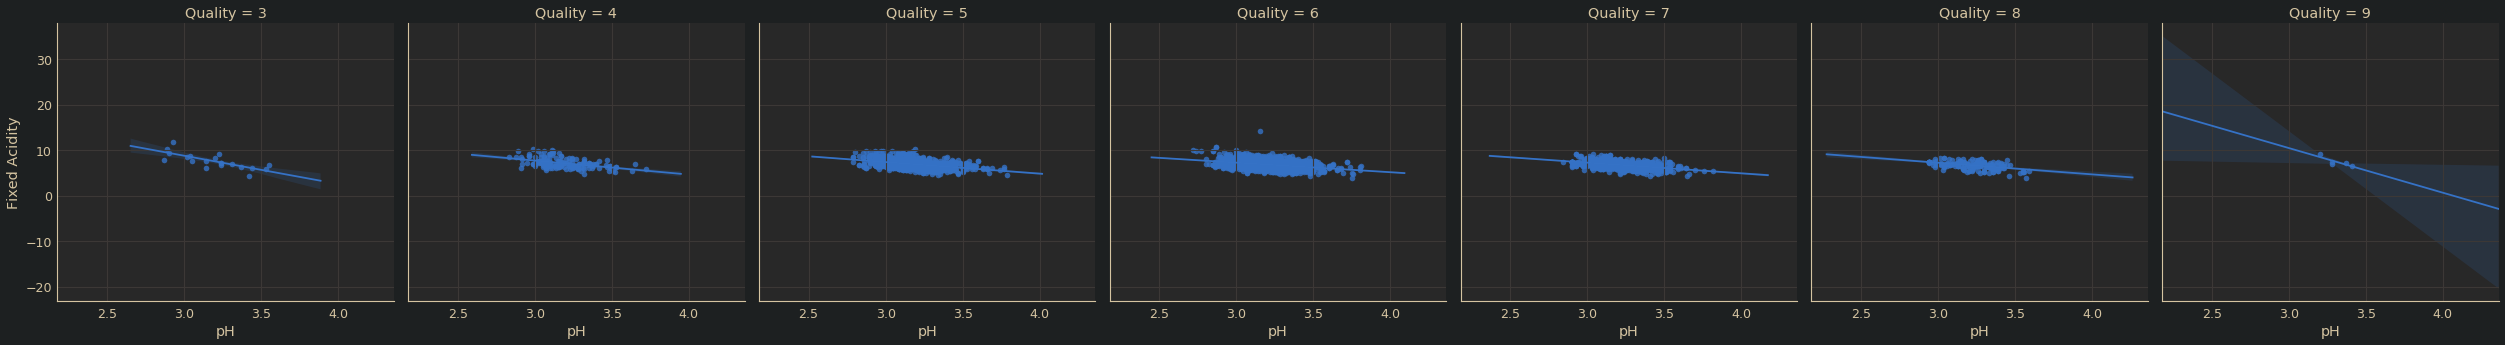

In [26]:
# We thus have as many columns as the number of different quality values.
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality")

We add colours to the plot based on the Alcohol content. 

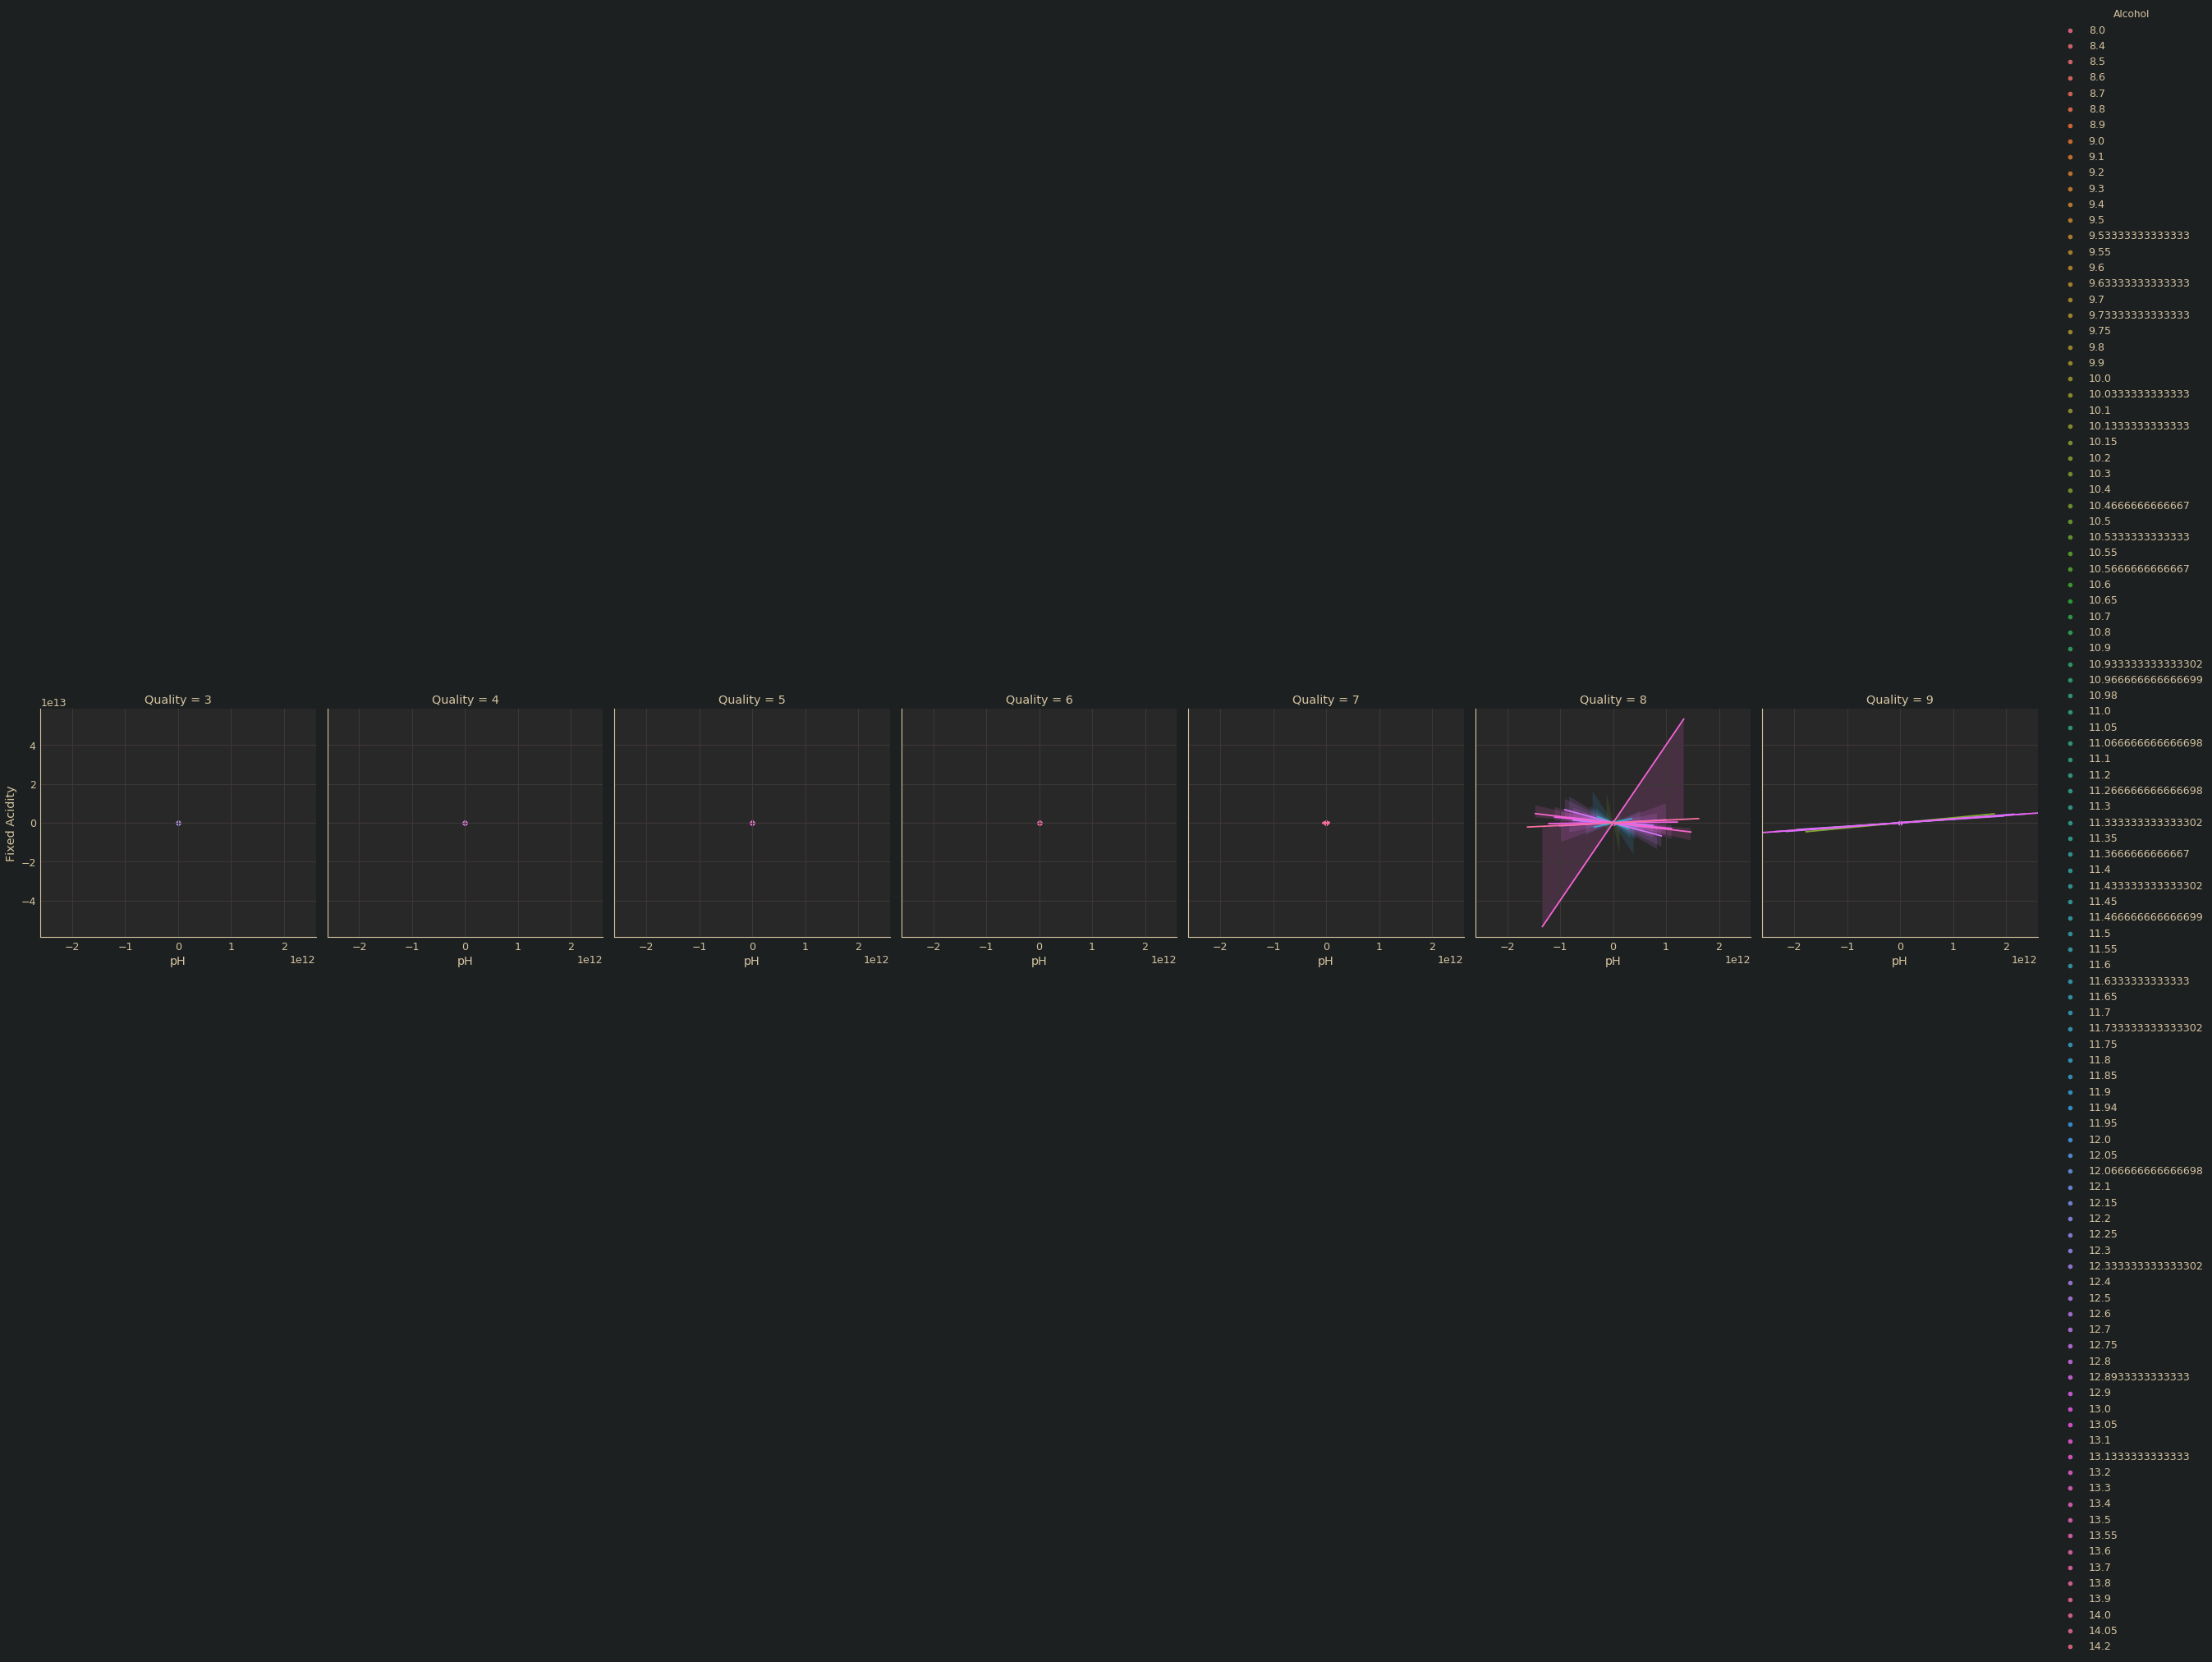

In [27]:
#Thus we get a set of shaded plots. 
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality", hue="Alcohol")

From the colors, we see that higher alcohol content samples dominate a quality of 9, while mid range dominates quality 4.

Let us add a row of wine density,

### Instead of adding a row attribute, let us replace the col attribute by the row attribute. 
Both can be used together to create a matrix of graphs


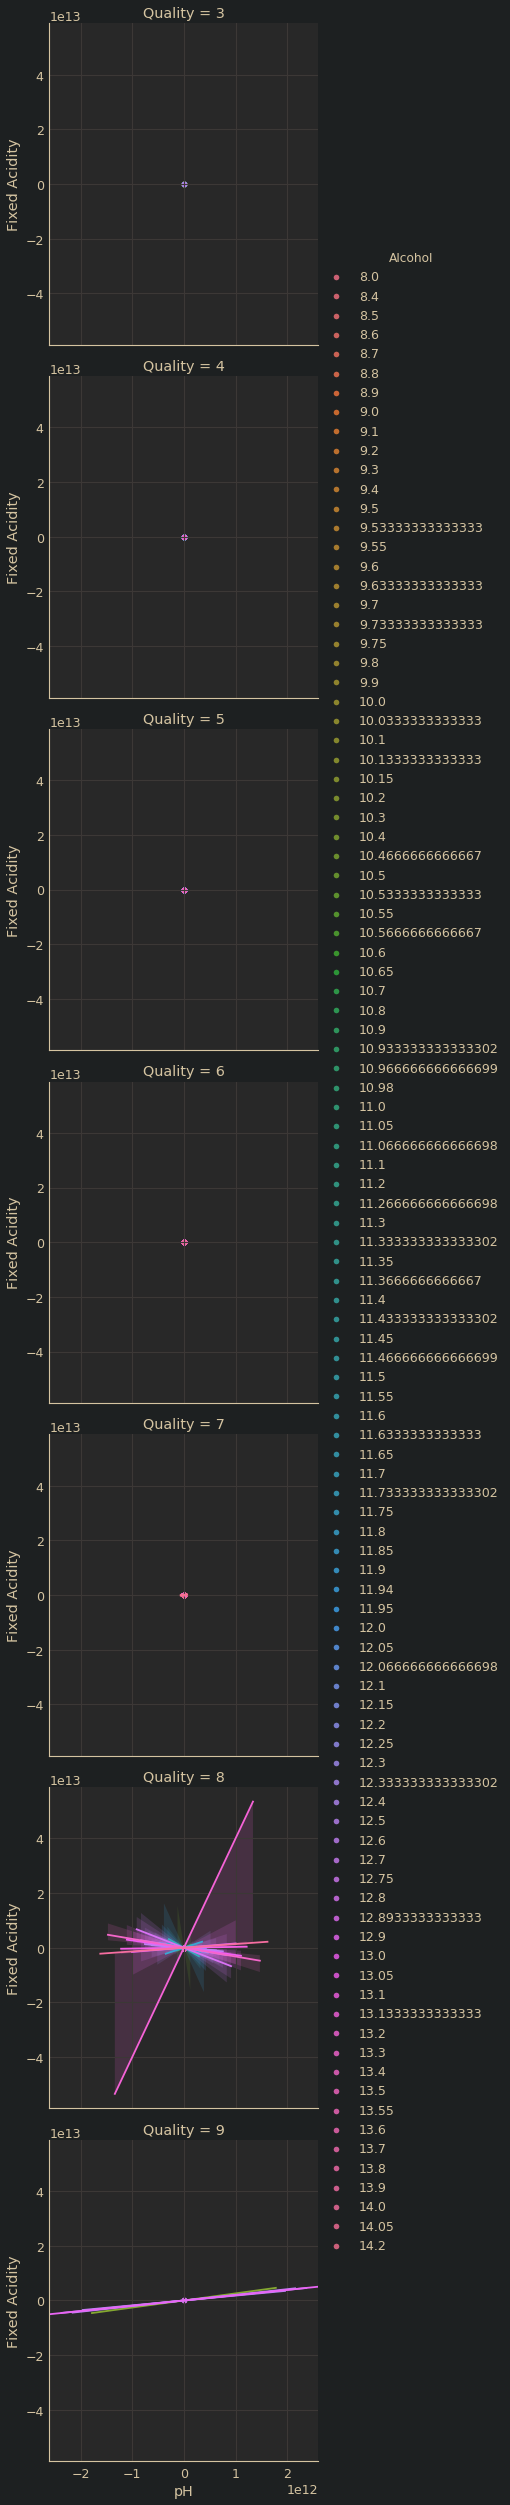

In [28]:
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, hue="Alcohol", row="Quality")

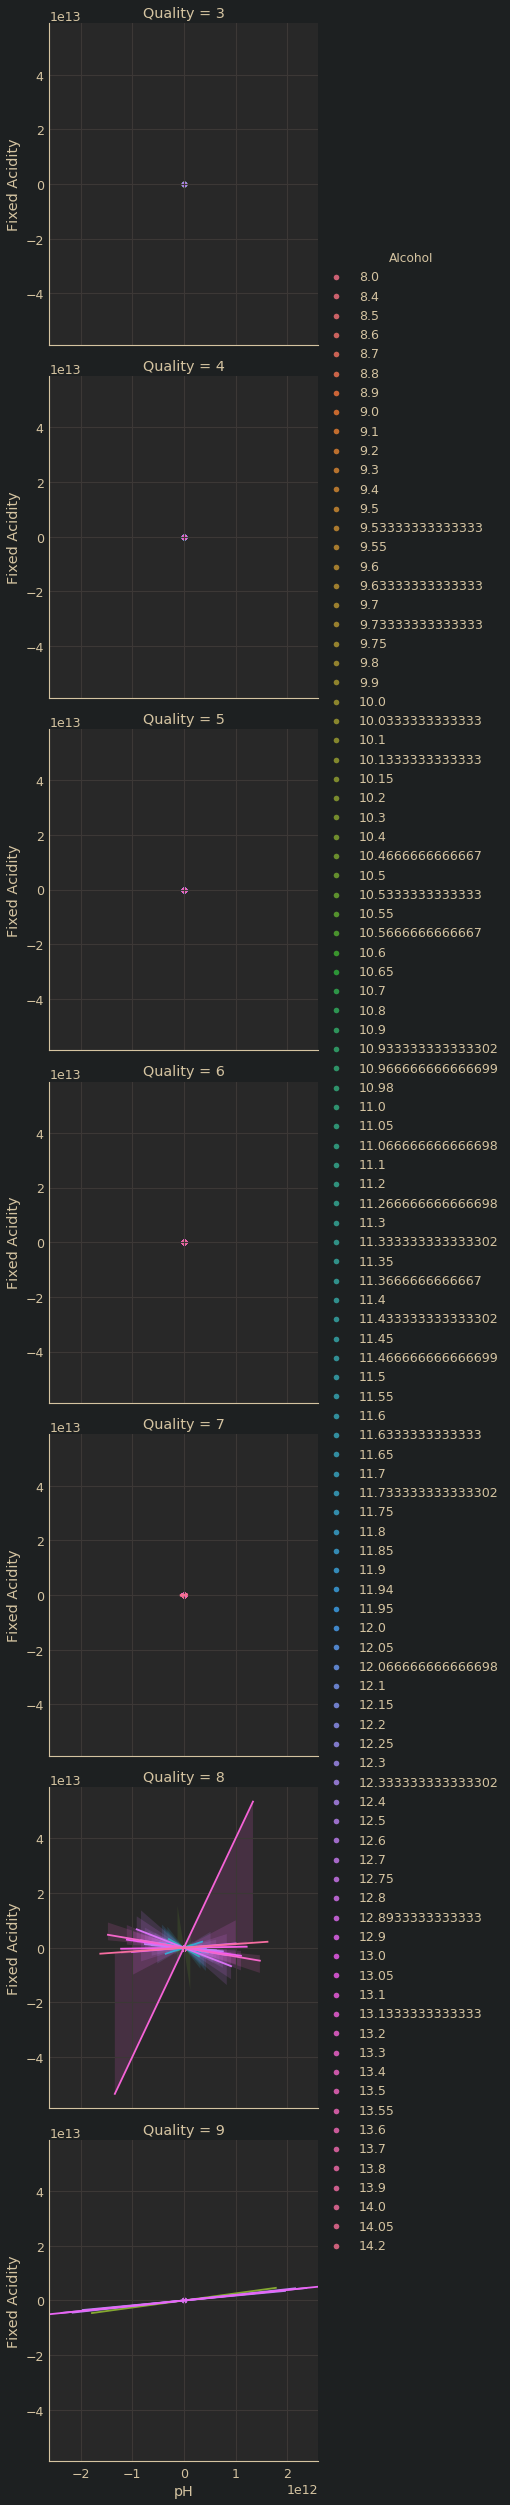

In [29]:
#Thus we get a set of shaded plots. 
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, row="Quality",hue="Alcohol")

### An alternative to lmplot()

#### Seaborn offers another function for plotting regression plots - called the regplot.

Let's plot one using the regplot() function

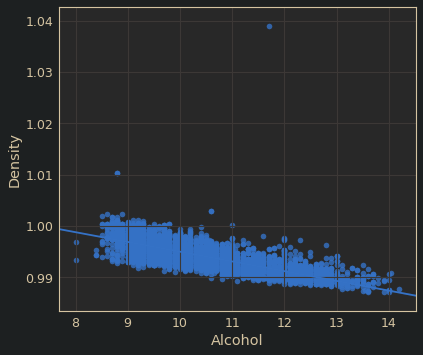

In [30]:
sns.regplot(x='Alcohol', y='Density', data=wine_data)

Isn't this identical to the lmplot graph output? <br>
What are the differences between the regplot and the lmplot functions?
* Visibly, the figure shapes are different. This is because regplot is an axes-level function, meaning you can specify the axes on which the graph is drawn. Quoting from the official documentation, "This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explictly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions."
* regplot() accepts variables in different formats (numpy arrays, pandas series, dataframe variable references)
* lmplot() needs data as a parameter and strings x and y
* regplot has a subset of the features provided by lmplot()
* The other important difference is that lmplot allows you to compare more than just two variables, as we saw above.

#### Illustrating sending other data formats into the regplot. We expect the same plot as above

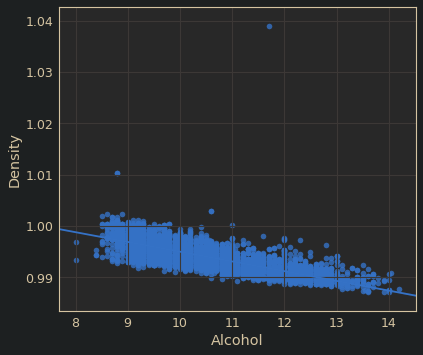

In [31]:
sns.regplot(x=wine_data['Alcohol'], y=wine_data['Density'], data=wine_data)

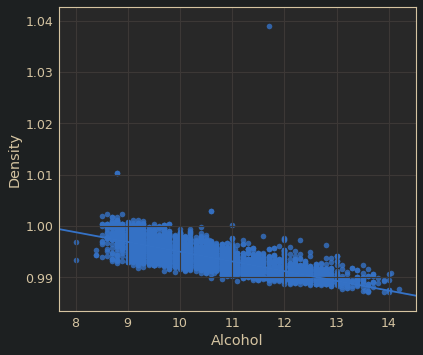

In [32]:
sns.regplot(wine_data.Alcohol, wine_data.Density, data=wine_data)

## Controlling the size and shape of the plot

#### For the reg plot,

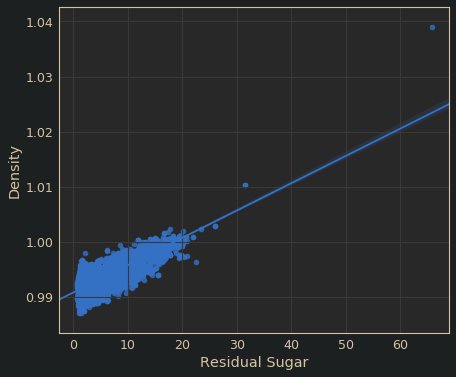

In [33]:
#We create a figure object to control the size. 
#The parameters inside the figsize denote the lengths of the box alloted for the plot
f, ax = plt.subplots(figsize=(7, 6))

#Pass the defined axis as the axis to be used for the regplot
sns.regplot(x='Residual Sugar', y='Density', data=wine_data, ax=ax);

#### For the lmplot
We use the size and aspect parameters. These apply to each facet in the plot, not the complete plotting area.
size refers to the height; aspect*size gives the width of each facet in inches

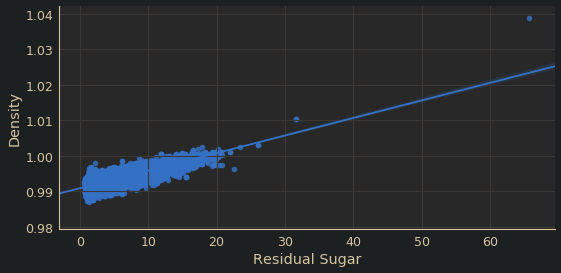

In [34]:
sns.lmplot(x='Residual Sugar', y='Density', data=wine_data, size=4, aspect=2);

### Can we use the regression plot to create interesting scenarios in our bivariate distributions?


With the jointplot, we can use regplot to show the linear regression fit on the joint axes

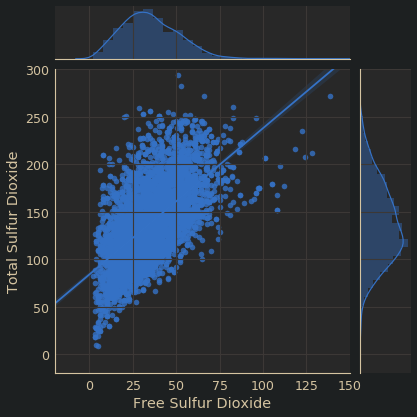

In [35]:
# We have simply added the kind=reg parameter to the jointplot we created earlier.
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              xlim={-20,150}, ylim={-20,300}, kind="reg")

With the pairplot, regplot can be used to show the linear relationship between variables in the dataset

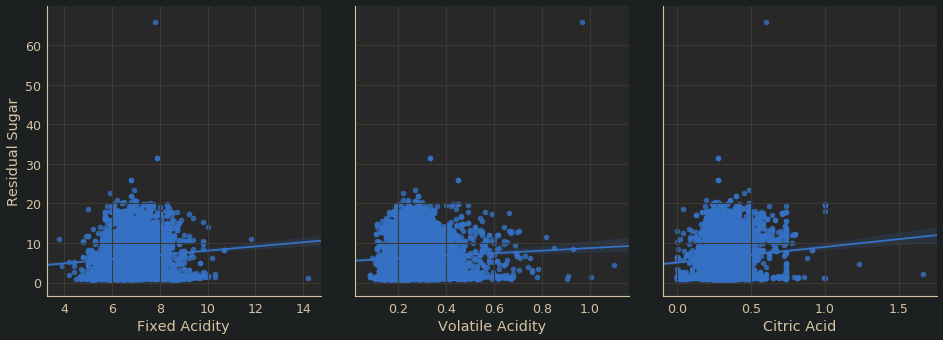

In [36]:
#We have used the pairplot we created earlier but tweaked the x and y variables to get a more compact graph, 
#changed the size and aspect ratio, and added a kind parameter.
sns.pairplot(wine_data, 
             size=5, aspect=0.9, 
             x_vars=["Fixed Acidity","Volatile Acidity","Citric Acid"],
             y_vars=["Residual Sugar"],
             kind="reg")c

The graphs show he relation between Fixed acidity, volatile acidity and citric acid with residual sugar in the wine samples. 
*Observe that unlike the lmplot, this creates separate plots for each set of variables.*